## Learning Objectives

At the end of the experiment, you will be able to

* understand what is Kernel and know different type of kernels
* perform Linear  and Kernel based SVM Classification
* understand the significance of C and gamma hyperparameter for regularization
* perform Support Vector Regression

### Introduction

**Support vector machines** are a set of supervised learning methods used for classification, regression, and outliers detection. 

A simple linear SVM classifier works by making a straight line between two classes. That means all of the data points on one side of the line will represent a category and the data points on the other side of the line will be put into a different category. This means there can be an infinite number of lines to choose from.

**Hyperplanes** are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes.
 * The hyperplane with maximum margin is called the optimal hyperplane.

**Support vectors** are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. 

**Margin** is the width that the boundary could be increased by before hitting a data point.

![wget](https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/linear_data.png)

### How SVM works with linear and non-linear separable data

Linear separable data

*  Find the extreme points of the dataset, which are called support vectors.
*  Get the optimal hyperplane that has the highest margin between the line and support vectors

Non-linear and inseparable data

*  Use **Kernels** to transform data into higher dimensions.
*  Separate the points using Linear SVM

### Kernel

The kernel means transforming data into another dimension that has a clear dividing margin between classes of data.

$K(x_i,x_j) = \phi (x_i)^T.\phi (x_j)$ is called a kernel function.

Hence, in machine learning, a kernel is a function capable of computing the dot product $ϕ(x_i)^T ϕ(x_j)$ based only on the original vectors $x_i$ and $x_j$, without having to compute (or even to know about) the transformation $ϕ$. This is the essence of the kernel trick.

Some of the most commonly used kernels are:

* Linear: 
$$K(x_i, x_j) = x_i^Tx_j$$
* Polynomial: 
$$K(x_i, x_j) = (\gamma x_i^Tx_j + r)^d$$
* Gaussian Radial Basis Function (RBF): 
$$K(x_i, x_j) = exp(-\gamma ||x_i - x_j||^2)$$
* Sigmoid: 
$$K(x_i, x_j) = tanh(\gamma x_i^Tx_j + r)$$

where $x_i$ and $x_j$ are original vectors, $d$ is degree of polynomial, $r$ is free parameter and $\gamma$ is regularization parameter.

One of the most commonly used kernels for SVM is RBF kernel. Let's see how it works.

**Let's see how we can make classification using linear, polynomial, and rbf kernel of SVM.**

In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets#.samples_generator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import seaborn as sns 
from matplotlib.colors import ListedColormap                              # for filling colors in mapping
from sklearn.metrics import confusion_matrix, accuracy_score              # importing confusion matrix, accuracy score
from sklearn.svm import SVC, SVR, LinearSVC                               # importing Support vector classifier, Support Vector Regressor, LinearSVC  
from sklearn.preprocessing import StandardScaler, LabelEncoder            # preprocessing
from sklearn.model_selection import train_test_split                      # for splitting the dataset
from mlxtend.plotting import plot_decision_regions                        # to plot the decision boundaries and hyperplane
from sklearn.pipeline import make_pipeline                                # to import pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs 

Exercise 1: Load the moon dataset 

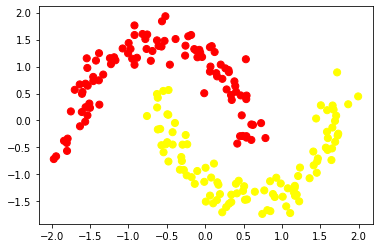

In [ ]:
# The number of points generated is 200 
# The Standard deviation of Gaussian noise added to the data is 0.1

X, y = datasets.make_moons(200, noise=.1)  
# Scale the data
X = StandardScaler().fit_transform(X)
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Exercise 2: Splitting the data into training and testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 123)
print(X_train.shape, y_train.shape)

(140, 2) (140,)


Exercise 3: Apply the SVM classifier and try to fit the model using **Linear Kernel** on the data

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

Exercise 4:Visualize the decision boundaries of the data

In [ ]:
# Function for plotting Decision boundaries

def plot_svc_decision_boundaries(model, ax=None):
    
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()                  # get the current Axes instance on the current figure matching the given keyword arguments, or create one
    xlim = ax.get_xlim()                # return the x-axis view limits
    ylim = ax.get_ylim()                # return the y-axis view limits
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y= np.linspace(ylim[0], ylim[1], 30)
   
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.reshape(-1), Y.reshape(-1)]).T
    # Evaluates the decision function for the samples in X.
    P = model.decision_function(xy).reshape(X.shape)  
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


Exercise 5:Call the above function by passing the trained model to observe the decision boundaries

Text(0.5, 1.0, 'Linear SVM')

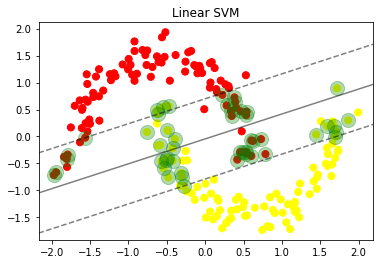

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_boundaries(clf);
# Visualize the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=200, lw=1, facecolors='green', alpha=0.3);

plt.title("Linear SVM")

Exercise 6 :predict the test data using linear svm and print the accuracy of classification

In [ ]:
y_pred = clf.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred)
print(acc_linear)

0.9333333333333333


###confusion matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

Exercise 7: Print the confusion matrix of the model

In [ ]:
# confusion matrix between true values and predicted outcomes for first model
cm = confusion_matrix(y_test, y_pred)   

In [ ]:
cm

array([[26,  1],
       [ 3, 30]])

##Polynomial Kernel SVM

Now, we apply SVM Classifier using **Polynomial Kernel**

In Scikit-Learn, we apply kernelized SVM simply by changing `linear` kernel to `poly` kernel.

Exercise 8: Apply the SVM classifier and try to fit the model using **Polynomial Kernel** on the data

In [ ]:
# Kernel is 'poly'
clf = SVC(kernel='poly', degree= 3, coef0= 1)
clf.fit(X_train, y_train)

SVC(coef0=1, kernel='poly')

Exercise 9:Visualize the decision boundaries of the data using Polynomial Kernel

Text(0.5, 1.0, 'Polynomial kernel SVM')

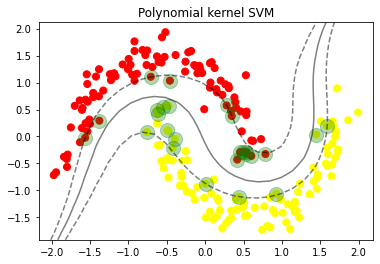

In [ ]:
# Call the decision boundary function 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_boundaries(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=200, lw=1, facecolors='green', alpha=0.3);

plt.title("Polynomial kernel SVM")

Exercise 9 :predict the test data using polynomial svm and print the accuracy of classification

In [ ]:
# Make prediction on test data
y_pred = clf.predict(X_test)
acc_polynomial = accuracy_score(y_test, y_pred)

In [ ]:
acc_polynomial 

1.0

#RBF kernel SVM

Now, we apply SVM Classifier using **RBF Kernel**

In Scikit-Learn, apply kernelized SVM by changing `linear` kernel to `rbf` kernel

Exercise 10: Apply the SVM classifier and try to fit the model using **RBF Kernel** on the data

In [ ]:
# Kernel is 'rbf'
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

Exercise 11:Visualize the decision boundaries of the data using RBF Kernel

Text(0.5, 1.0, 'RBF kernel SVM')

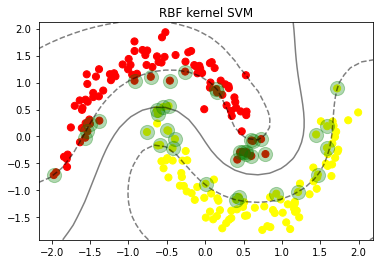

In [ ]:
# Call the decision boundary function 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_boundaries(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=200, lw=1, facecolors='green', alpha=0.3);

plt.title("RBF kernel SVM")

Exercise 12 :predict the test data using linear svm and print the accuracy of classification

In [ ]:
# Make prediction on test data
y_pred = clf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred)

In [ ]:
acc_rbf

1.0

From the above results, we can see that a non-linear decision boundary can be seen in case of polynomial and rbf kernel. Their testing accuracies are also higher than the linear kernel.


### Tuning the SVM parameter (C)

For a very large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer and can grow to encompass some points.

Let us visualize the picture of how a changing C parameter affects the final fit, via the softening of the margin:

Exercise 13: Visualize the decision boundaries of the data using linerar Kernel for different C values.

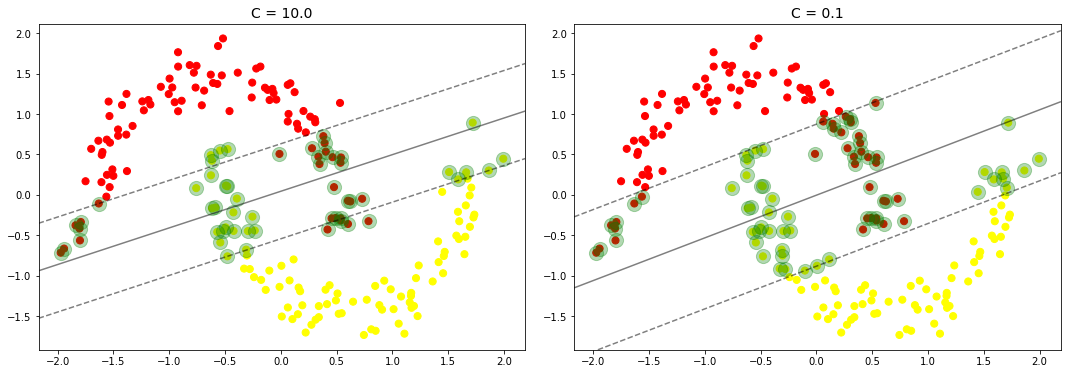

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_boundaries(model, axi)
    axi.scatter(model.support_vectors_[:, 0],                 # visualize the support vectors
                model.support_vectors_[:, 1],
                s=200, lw=1, facecolors='green', alpha=0.3);
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Note that the kernel used in the above problem was linear. In case of nonlinear SVM, other than C parameter we also have $\gamma$(gamma) parameter whose relationship with regularization is similar to C parameter, that is, the more the value of $\gamma$ lesser the regularization.

### Tuning the SVM parameter (gamma, $\gamma$)

Let us visualize the picture of how changing $\gamma$ and C parameters affect the final fit.purpose.

Exercise 14: Visualize the decision boundaries of the data using RBF Kernel for different gamma values.

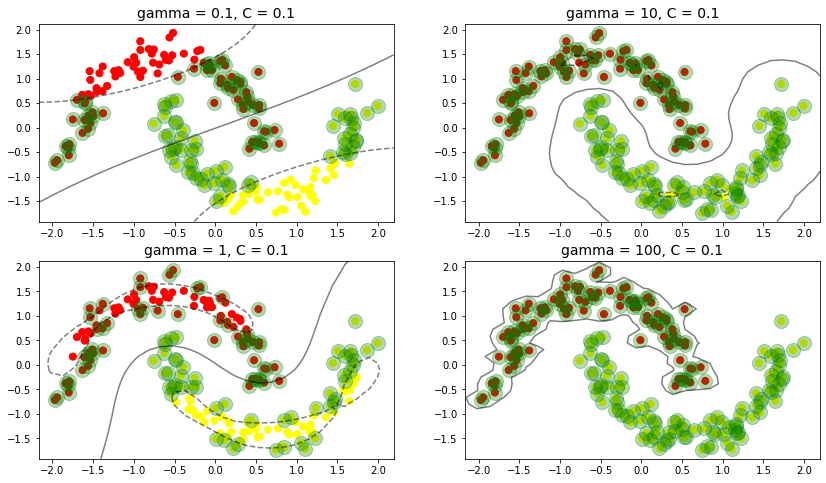

In [ ]:
# Visualize the model with different C and gamma hyperparameters
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(14, 8))

gamma_values = [0.1, 10, 1,100]
C_values =  [0.1,0.1, 0.1, 0.1]
for axi, g, C in zip([ax1, ax2, ax3, ax4], gamma_values, C_values):
    model = SVC(kernel='rbf', gamma = g, C=C).fit(X,y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_boundaries(model, axi)
    axi.scatter(model.support_vectors_[:, 0],                 # visualize the support vectors
                model.support_vectors_[:, 1],
                s=200, lw=1, facecolors='green', alpha=0.3);
    axi.set_title('gamma = {}, C = {}'.format(g, C), size=14)


The above plots show models trained with different values of hyperparameters gamma ($γ$) and C. Increasing gamma makes the bell-shaped curve narrower (see the lefthand plots). As a result, each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. 

Conversely, a small gamma value makes the bell-shaped curve wider: instances have a larger range of influence, and the decision boundary ends up smoother. So $γ$ acts like a regularization hyperparameter: if the model is overfitting, we should reduce it; if it is underfitting,
we should increase it (similar to the C hyperparameter).

### Support Vector Machine - Regression (SVR)

To use SVMs for regression instead of classification, the trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting
margin violations, SVM Regression tries to fit as many instances as possible
on the street while limiting margin violations (i.e., instances off the street). The width of the street is controlled by a hyperparameter, ε

![Image](https://www.saedsayad.com/images/SVR_2.png)

### Implementing Support Vector Regression (SVR)

#### Dataset

The dataset (Position_Salaries) consists of a list of positions in a company along with the band levels and their associated salary.

Information Used To Predict Salaries:

* Job Type: The position held (Business Analyst, Junior Consultant, Senior Consultant….)
* Position Level: Experience in years (1,2,3…..)

**Problem Statement**

To predict the accurate salary of an employee having a level 6.5, using SVM regression.

#### Importing the datasets

Exercise 15: import dataset for SVR

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
#defining independent and dependent variables
X = dataset.iloc[:,1:-1].values                        
y = dataset.iloc[:, -1].values                         

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
y = y.reshape(len(y),1)

In [ ]:
y.shape

(10, 1)

In [ ]:
X.shape

(10, 1)

Exercise 16: Visualize the dataset.

Text(0.5, 1.0, 'Visualization of the data')

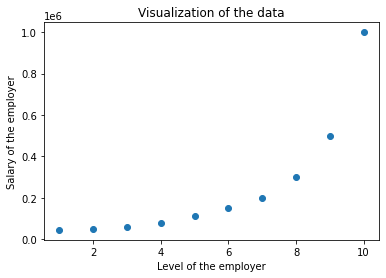

In [ ]:
#visualization of data
plt.scatter(X,y)
plt.xlabel("Level of the employer")
plt.ylabel("Salary of the employer")
plt.title("Visualization of the data")

Exercise 17: Scale the features

#### Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [ ]:
# Scaling the data
sc_X = StandardScaler()
sc_y = StandardScaler()
X= sc_X.fit_transform(X)
y= sc_y.fit_transform(y)

Exercise 18: Train the SVR model

#### Training the SVR model

In [ ]:
# defining the SVR model
regressor = SVR(kernel = 'rbf')    #rbf kernel     
regressor.fit(X,y)                    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

#### Predicting new Results

Exercise 19: Predict the new salary according to 6.5 level,i.e., 6.5 years of experience.

In [ ]:
y_pred = regressor.predict([[6.5]])
y_pred = sc_y.inverse_transform([y_pred]) 
#lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

In [ ]:
y_pred

array([[252789.13921624]])

Exercise 20: Visualize the SVR results

#### Visualizing the SVR results

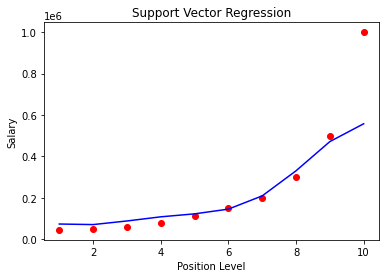

In [ ]:
# plotting Real Salaries as red dot scatter plot
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = "red")                   
# plotting the Predicted salaries by SVR Model
a=(regressor.predict(X))
b=sc_y.inverse_transform([a])
b=np.transpose(b)

plt.plot(sc_X.inverse_transform(X), b, color = "blue")   
plt.title("Support Vector Regression")                                                              
plt.xlabel("Position Level")                                                                        
plt.ylabel("Salary")   
plt.show()                                                                             

In the output- we have the best fit line that has the maximum number of points. The red dots show the actual dataset points and the blue line is the best fit obtained using SVM regressor.